# Laborator 6

Versiunea 2020-04-01

## Modele de clasificare

Folositi 4 seturi de date pentru probleme de clasificare, plecand de la repository-urile specificate in Cursul 5; de exemplu, [ics.uci.edu](http://archive.ics.uci.edu/ml/datasets.php?format=mat&task=cla&att=&area=&numAtt=&numIns=&type=mvar&sort=nameUp&view=table). Cel putin doua seturi de date sa fie cu valori lipsa. 


1. (20 puncte) Aplicati o metoda de missing value imputation, unde este cazul; justificati si documentati metoda folosita.
1. (numar de modele * numar de seturi de date \* 1 punct = 20 de puncte) Pentru fiecare set de date aplicati 5 modele de clasificare din scikit learn. Pentru fiecare raportati: acuratete, scorul F1 - a se vedea [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) - folosind 5 fold cross validation. Raportati mediile rezultatelor atat pentru fold-urile de antrenare, cat si pentru cele de testare. Rularile se vor face cu valori fixate ale hiperparametrilor. 
1. (numar modele * 4 puncte = 20 puncte) Documentati in jupyter notebook fiecare din modelele folosite, in limba romana. Daca acelasi algoritm e folosit pentru mai multe seturi de date, puteti face o sectiune separata cu documentarea algoritmilor + trimitere la algoritm. 
1. (numar de modele * numar de seturi de date * 1 punct = 20 de puncte) Raportati performanta fiecarui model, folosind 5 fold cross validation. Pentru fiecare din cele 5 rulari, cautati hiperparametrii optimi folosind 4-fold cross validation. Performanta modelului va fi raportata ca medie a celor  5 rulari. 
    *Observatie:* la fiecare din cele 5 rulari, hiperparametrii optimi pot diferi, din cauza datelor utilizate pentru antrenare/validare. 

Se acorda 20 de puncte din oficiu. 

Exemple de modele de clasificare:
1. [Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
1. [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
1. [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
1. [Gaussian processes](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier)
1. [RBF](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html#sklearn.gaussian_process.kernels.RBF)
1. [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
1. [Random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
1. [Gaussian Naive bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) 

In [5]:
import numpy as np
import pandas as pd

print ('numpy:', np.__version__)
print ('pandas:', pd.__version__)

import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

numpy: 1.18.1
pandas: 1.0.1


### 1. Missing value imputation

### 2. Accuracy and F1 score

### Wine Data Set
#### (http://archive.ics.uci.edu/ml/datasets/Wine)

### Data

#### Load data

In [8]:
wine_data = pd.read_csv(r'C:\f_Projects\II_Sem_2_V_REPOS\IDS\Lab6\Data\Wine\wine.data', header=None)
wine_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Interpret data

In [9]:
X_Wine = wine_data.values[:, 1:]
y_Wine = wine_data.values[:, 0] #prima coloana reprezinta ground truth

#### Preprocess data

In [10]:
def print_ranges(X):
    for col_index in range(X.shape[1]):
        column = X[:, col_index]
        print(f'{np.min(column)} \t {np.max(column)}')
        
print_ranges(X_Wine)

11.03 	 14.83
0.74 	 5.8
1.36 	 3.23
10.6 	 30.0
70.0 	 162.0
0.98 	 3.88
0.34 	 5.08
0.13 	 0.66
0.41 	 3.58
1.28 	 13.0
0.48 	 1.71
1.27 	 4.0
278.0 	 1680.0


#### Scale data

In [11]:
def scale_data(mat: np.array) -> np.array:    
    scaler = MinMaxScaler()
    scaler.fit(mat)
    return scaler.transform(mat)

In [12]:
X_Wine = scale_data(X_Wine)
print_ranges(X_Wine)

0.0 	 1.0
0.0 	 1.0
0.0 	 0.9999999999999999
0.0 	 1.0
0.0 	 1.0
0.0 	 1.0
0.0 	 0.9999999999999998
0.0 	 1.0
0.0 	 0.9999999999999999
0.0 	 0.9999999999999999
0.0 	 1.0
0.0 	 1.0
0.0 	 1.0


#### Augment data

In [13]:
def design_matrix(mat: np.array) -> np.array:
    """
    Functia adauga o coloana de 1 inainte de prima coloana.
    """
    
    l, c = mat.shape
    aux = np.ones((l, 1))
    result = np.concatenate((aux, mat), axis = 1)
    
    return result

In [14]:
X_Wine = design_matrix(X_Wine)
print(X_Wine)

[[1.         0.84210526 0.1916996  ... 0.45528455 0.97069597 0.56134094]
 [1.         0.57105263 0.2055336  ... 0.46341463 0.78021978 0.55064194]
 [1.         0.56052632 0.3201581  ... 0.44715447 0.6959707  0.64693295]
 ...
 [1.         0.58947368 0.69960474 ... 0.08943089 0.10622711 0.39728959]
 [1.         0.56315789 0.36561265 ... 0.09756098 0.12820513 0.40085592]
 [1.         0.81578947 0.66403162 ... 0.10569106 0.12087912 0.20114123]]


#### Split data

In [15]:
test_size = 1/3
random_state = 5
X_Wine_train, X_Wine_test, y_Wine_train, y_Wine_test = train_test_split(X_Wine, y_Wine, test_size=test_size, random_state=random_state)

### Model

#### Accuracy on prediction

In [16]:
def accuracy_test(name:str, model, y_test, y_predicted) -> None:
    accuracy_test = accuracy_score(y_test, y_predicted)
    print(f'Accuracy ({name}): {accuracy_test}')

#### Accuracy (5-fold)

In [17]:
def accuracy_5fold(name:str, model, X, y) -> None:
    
    scoring_acc = 'accuracy'
    cv = 5
    
    score_accuracy = cross_val_score(model, X, y, cv=cv, scoring=scoring_acc)
    print(f'Accuracy ({name}, {cv}-fold cv):\n {score_accuracy}')
    mean_score_accuracy = score_accuracy.mean()
    print(f'Mean Accuracy ({name}, {cv}-fold cv): {mean_score_accuracy}')

#### F1 score (5-fold)

In [18]:
def f1_5fold(name:str, model, y_test, y_predicted) -> None:
    
    average = 'weighted'
    cv = 5
    
    score_f1 = f1_score(y_test, y_predicted, average=average)
    print(f'F1 score ({name}, {cv}-fold cv):\n {score_f1}')

#### Score measuring

In [19]:
def score(name:str, scoring, model, X_train, y_train, X_test, y_test) -> None:
    
    cv = 5
    
    score_accuracy_train = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
    print(f'Train {scoring} ({name}, {cv}-fold cv):\n {score_accuracy_train}')

    mean_score_accuracy_train = score_accuracy_train.mean()
    print(f'Train Mean {scoring} ({name}, {cv}-fold cv): {mean_score_accuracy_train}')

    print()

    score_accuracy_test = cross_val_score(model, X_test, y_test, cv=cv, scoring=scoring)
    print(f'Test {scoring} ({name}, {cv}-fold cv):\n {score_accuracy_test}')

    mean_score_accuracy_test = score_accuracy_test.mean()
    print(f'Test Mean {scoring} ({name}, {cv}-fold cv): {mean_score_accuracy_test}')

#### Hyperparameter search

In [20]:
def hyper(model, parameter_grid, X, y, X_train, y_train, X_test, y_test) -> None:
    
    """
    :param X: matricea de intrare
    :param y: ground truth
    """
    
    cv = 5
    nest_cv = 4
    scoring = 'accuracy'
    
    #initializam GridSearch pentru Accuracy
    grid_search = GridSearchCV(estimator = model,
                               param_grid = parameter_grid,
                               scoring = scoring,
                               cv = cv,
                               return_train_score = True)   
    
    #la fiecare rulare din 5-fold se face un 4-fold cross validation
    scores = cross_val_score(grid_search, X, y, cv = nest_cv)

    print('Accuracy:')
    
    print(f'Scores for {nest_cv}-fold cross validation:\n {scores}')
    print(f'Mean score for {nest_cv}-fold cross validation: {scores.mean()}')
    
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    print(f'Best parameters (X_test): {best_params}')
        
    y_estimated = grid_search.predict(X_test)   
    acc_score = accuracy_score(y_test, y_estimated)
    print(f'accuracy_score(y_test, y_estimated): {acc_score}') 

#### Apply model

In [21]:
def apply_model(name: str, model, parameter_grid, X, y, X_train, y_train, X_test, y_test) -> None:
    
    #Fit
    model.fit(X_train, y_train)

    #Predict
    y_predicted = model.predict(X_test)
    
    #Accuracy after prediction
    print('Accuracy on test set after prediction')
    accuracy_test(name, model, y_test, y_predicted)
    print()   

    #Accuracy score (5-fold)
    print('Accuracy score (5-fold)')
    accuracy_5fold(name, model, X, y)
    print()   

    #F1 score (5-fold)
    print('F1 score (5-fold)')
    f1_5fold(name, model, y_test, y_predicted)
    print()  

    #Accuracy (5-fold) for training and test set
    print('Accuracy (5-fold) for training and test set')
    score(name, 'accuracy', model, X_train, y_train, X_test, y_test)
    print()   

    #F1 score (5-fold) for training and test set
    print('F1 score (5-fold) for training and test set')
    score(name, 'f1_macro', model, X_train, y_train, X_test, y_test)
    print()

    #Hyperparameter search
    print('Hyperparameter search')
    hyper(model, parameter_grid, X, y,
          X_train, y_train,
          X_test, y_test)
    print()

### Multi-layer Perceptron classifier

#### Initialise

In [ ]:
max_iters = 10000
model_MLPC_Wine = MLPClassifier(max_iter=max_iters)

#### Apply model

In [ ]:
parameter_grid = {'alpha' : list([0.001, 0.0001, 0.01, 0.005, 0.0005, 0.05])}
apply_model('MLPC', model_MLPC_Wine, parameter_grid, X_Wine, y_Wine, X_Wine_train, y_Wine_train, X_Wine_test, y_Wine_test)

### KNN

#### Initialise

In [ ]:
n_neighbours = 5
model_KNN_Wine = KNeighborsClassifier(n_neighbors=n_neighbours)

#### Apply model

In [ ]:
parameter_grid = {'n_neighbors': list(range(1, 10)), 'p': [1, 2, 3, 4.7]}
apply_model('KNN', model_KNN_Wine, parameter_grid, X_Wine, y_Wine, X_Wine_train, y_Wine_train, X_Wine_test, y_Wine_test)

In [22]:
from sklearn.svm import SVC

In [24]:
kernel = 'rbf'
model_SVC_Wine = SVC(kernel=kernel)

In [25]:
parameter_grid = {'C': [1, 10, 100], 'gamma': [0.01, 0.1]}
apply_model('SVC', model_SVC_Wine, parameter_grid, X_Wine, y_Wine, X_Wine_train, y_Wine_train, X_Wine_test, y_Wine_test)

Accuracy on test set after prediction
Accuracy (SVC): 0.9833333333333333

Accuracy score (5-fold)
Accuracy (SVC, 5-fold cv):
 [1.         0.97222222 0.97222222 1.         0.97142857]
Mean Accuracy (SVC, 5-fold cv): 0.9831746031746033

F1 score (5-fold)
F1 score (SVC, 5-fold cv):
 0.9833498268184068

Accuracy (5-fold) for training and test set
Train accuracy (SVC, 5-fold cv):
 [0.95833333 1.         1.         1.         0.95652174]
Train Mean accuracy (SVC, 5-fold cv): 0.9829710144927537

Test accuracy (SVC, 5-fold cv):
 [0.91666667 1.         1.         0.91666667 1.        ]
Test Mean accuracy (SVC, 5-fold cv): 0.9666666666666666

F1 score (5-fold) for training and test set
Train f1_macro (SVC, 5-fold cv):
 [0.96023392 1.         1.         1.         0.96023392]
Train Mean f1_macro (SVC, 5-fold cv): 0.984093567251462

Test f1_macro (SVC, 5-fold cv):
 [0.92207792 1.         1.         0.9047619  1.        ]
Test Mean f1_macro (SVC, 5-fold cv): 0.9653679653679653

Hyperparameter searc

Automatically created module for IPython interactive environment
[0.93333333 1.         0.96666667 1.         1.        ]
[0.93333333 0.96       0.94666667 0.96       0.98       0.96666667
 0.97333333 0.96666667 0.95333333 0.98       0.96       0.96666667
 0.97333333 0.96666667 0.96       0.96       0.96       0.96
 0.96666667 0.98666667 0.96       0.98       0.96       0.96666667
 0.97333333 0.97333333 0.96       0.97333333 0.97333333 0.98      ]
Average difference of 0.007619 with std. dev. of 0.009383.


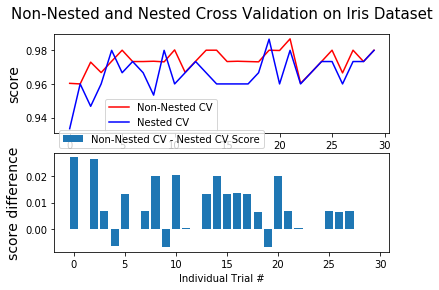

In [28]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

print(__doc__)

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(nested_score)
print(nested_scores)

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

### 3. Documentation

### 4. Hyperparameter search